In [68]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'bac5687b-e901-444c-89eb-d4fa8f83d56e',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-09-23T07:00:24.700Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9111}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10476, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [69]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [70]:
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19493400.00000,19493400.00000,False,NaN,1,NaN,NaN,None,2023-09-23T06:58:00.000Z,26576.78287,9897643570.27624,-28.97360,0.09762,-0.13200,0.36958,0.47832,-8.80099,-13.94496,518071859242.25909,49.11820,558112440317.62000,None,2023-09-23T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 07:00:30.277730+00:00
1,1027,Ethereum,ETH,ethereum,7427,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120227075.13697,120227075.13697,True,NaN,2,NaN,NaN,None,2023-09-23T06:58:00.000Z,1594.56460,3177310887.33454,-37.93440,0.04134,0.19155,-2.52556,-4.84807,-13.90665,-17.03026,191709837465.71313,18.17510,191709837465.70999,None,2023-09-23T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 07:00:30.277730+00:00
2,825,Tether USDt,USDT,tether,62706,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83201358999.17218,86426198726.43625,True,NaN,3,NaN,NaN,None,2023-09-23T06:58:00.000Z,0.99995,15625930419.38585,-26.57250,-0.01546,0.01592,-0.01931,0.01884,0.01197,-0.03601,83197355297.64757,7.88630,86422039843.60001,None,2023-09-23T06:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-23 07:00:30.277730+00:00
3,1839,BNB,BNB,bnb,1633,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153847528.76060,153847528.76060,False,NaN,4,NaN,NaN,None,2023-09-23T06:58:00.000Z,210.83635,259043469.78394,-31.20990,0.11271,0.04911,-1.81946,-3.83525,-11.20004,-12.26645,32436651326.71306,3.07470,32436651326.71000,None,2023-09-23T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 07:00:30.277730+00:00
4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53245240268.00000,99988414766.00000,False,NaN,5,NaN,NaN,None,2023-09-23T06:58:00.000Z,0.51317,616390049.10023,-29.61640,0.10027,1.00472,2.84827,-2.75609,-25.48669,4.60149,27323828208.92717,2.59000,51316940390.16000,None,2023-09-23T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 07:00:30.277730+00:00
5,3408,USD Coin,USDC,usd-coin,14200,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25758457488.84406,25758457488.84406,False,NaN,6,NaN,NaN,None,2023-09-23T06:58:00.000Z,1.00006,2473389421.90986,-20.39030,-0.00708,0.01663,-0.00176,0.00107,0.01261,0.01113,25760102438.12007,2.44220,25760102438.12000,None,2023-09-23T06:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-23 07:00:30.277730+00:00
6,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,141121146383.70526,141121146383.70526,True,NaN,7,NaN,NaN,None,2023-09-23T06:58:00.000Z,0.06166,130809766.39366,-34.32260,0.02106,0.07514,-0.90752,-3.42997,-20.34549,-8.94896,8701897649.14683,0.82500,8701897649.15000,None,2023-09-23T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 07:00:30.277730+00:00
7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35118390025.26100,36198584811.42400,False,NaN,8,NaN,NaN,None,2023-09-23T06:58:00.000Z,0.24556,107259676.95862,-6.43810,-0.03509,0.00542,-2.02083,-8.82603,-19.16668,-17.61627,8623556503.39254,0.817

In [18]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #original Sandbox Environment:'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'bac5687b-e901-444c-89eb-d4fa8f83d56e',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc=True)
    df
    
    if not os.path.isfile(r'C:\Users\Admin\Downloads\DA\Pandas\da_tut\pull\API.csv' ):
        df.to_csv(r'C:\Users\Admin\Downloads\DA\Pandas\da_tut\pull\API.csv', header ='column_names')
    else: 
        df.to_csv(r'C:\Users\Admin\Downloads\DA\Pandas\da_tut\pull\API.csv', mode ='a', header = False)
    

In [19]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed')
    sleep(60) #sleep for 1 minute
exit()

API runner completed
API runner completed
API runner completed


KeyboardInterrupt: 

In [71]:
df72 = pd.read_csv(r'C:\Users\Admin\Downloads\DA\Pandas\da_tut\pull\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19493312.00000,19493312.00000,False,NaN,1,NaN,NaN,NaN,2023-09-23T04:31:00.000Z,26547.31932,10207904058.52497,-25.67590,-0.04261,-0.33630,-0.17390,0.51854,-8.73186,-14.24082,517495178271.14691,49.12480,557493705722.96997,NaN,2023-09-23T04:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 04:32:43.058191+00:00
1,1,1027,Ethereum,ETH,ethereum,7426,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120227075.13697,120227075.13697,True,NaN,2,NaN,NaN,NaN,2023-09-23T04:31:00.000Z,1592.10170,3258036668.44456,-36.75540,-0.03429,-0.12278,-2.98250,-4.85029,-13.93939,-16.88562,191413730805.95209,18.16920,191413730805.95001,NaN,2023-09-23T04:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 04:32:43.058191+00:00
2,2,825,Tether USDt,USDT,tether,62705,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83201358999.17218,86426198726.43625,True,NaN,3,NaN,NaN,NaN,2023-09-23T04:31:00.000Z,0.99999,16091638513.74778,-93.17780,-0.00456,0.02275,-0.01672,0.02005,-0.02064,-0.03488,83200762706.59286,7.89890,86425579321.88000,NaN,2023-09-23T04:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-23 04:32:43.058191+00:00
3,3,1839,BNB,BNB,bnb,1633,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153847537.06874,153847537.06874,False,NaN,4,NaN,NaN,NaN,2023-09-23T04:31:00.000Z,210.46319,266309534.08099,-30.48010,-0.05384,-0.61277,-2.09971,-2.89562,-11.54394,-12.10322,32379243768.89203,3.07400,32379243768.89000,NaN,2023-09-23T04:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 04:32:43.058191+00:00
4,4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53245240268.00000,99988414766.00000,False,NaN,5,NaN,NaN,NaN,2023-09-23T04:31:00.000Z,0.51273,672573210.94632,-52.14420,0.00165,0.06418,2.41491,-2.94314,-26.03967,4.44216,27300541110.11264,2.59180,51273204839.91000,NaN,2023-09-23T04:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 04:32:43.058191+00:00
5,5,3408,USD Coin,USDC,usd-coin,14200,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25757466439.46171,25757466439.46171,False,NaN,6,NaN,NaN,NaN,2023-09-23T04:31:00.000Z,1.00008,2546663808.78140,-16.35690,-0.00215,0.01301,-0.00353,0.00138,-0.00973,0.01557,25759630029.72560,2.44510,25759630029.73000,NaN,2023-09-23T04:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-23 04:32:43.058191+00:00
6,6,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,141119996383.70526,141119996383.70526,True,NaN,7,NaN,NaN,NaN,2023-09-23T04:31:00.000Z,0.06158,133199833.04240,-90.23460,0.02942,-0.04385,-1.37164,-3.45777,-20.02236,-9.32611,8690486198.78299,0.82500,8690486198.78000,NaN,2023-09-23T04:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 04:32:43.058191+00:00
7,7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35118392743.88200,36198584811.42400,False,NaN,8,NaN,NaN,NaN,2023-09-23T04:31:00.000Z,0.24490,109400321.05878,-85.28340,0.28501,-0.55325,-2.70915,-8.79008,-19.26064,-17.61684

In [72]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19493400.00000,19493400.00000,False,NaN,1,NaN,NaN,None,2023-09-23T06:58:00.000Z,26576.78287,9897643570.27624,-28.97360,0.09762,-0.13200,0.36958,0.47832,-8.80099,-13.94496,518071859242.25909,49.11820,558112440317.62000,None,2023-09-23T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 07:00:30.277730+00:00
1,1027,Ethereum,ETH,ethereum,7427,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120227075.13697,120227075.13697,True,NaN,2,NaN,NaN,None,2023-09-23T06:58:00.000Z,1594.56460,3177310887.33454,-37.93440,0.04134,0.19155,-2.52556,-4.84807,-13.90665,-17.03026,191709837465.71313,18.17510,191709837465.70999,None,2023-09-23T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 07:00:30.277730+00:00
2,825,Tether USDt,USDT,tether,62706,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83201358999.17218,86426198726.43625,True,NaN,3,NaN,NaN,None,2023-09-23T06:58:00.000Z,0.99995,15625930419.38585,-26.57250,-0.01546,0.01592,-0.01931,0.01884,0.01197,-0.03601,83197355297.64757,7.88630,86422039843.60001,None,2023-09-23T06:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-23 07:00:30.277730+00:00
3,1839,BNB,BNB,bnb,1633,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153847528.76060,153847528.76060,False,NaN,4,NaN,NaN,None,2023-09-23T06:58:00.000Z,210.83635,259043469.78394,-31.20990,0.11271,0.04911,-1.81946,-3.83525,-11.20004,-12.26645,32436651326.71306,3.07470,32436651326.71000,None,2023-09-23T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 07:00:30.277730+00:00
4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53245240268.00000,99988414766.00000,False,NaN,5,NaN,NaN,None,2023-09-23T06:58:00.000Z,0.51317,616390049.10023,-29.61640,0.10027,1.00472,2.84827,-2.75609,-25.48669,4.60149,27323828208.92717,2.59000,51316940390.16000,None,2023-09-23T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 07:00:30.277730+00:00
5,3408,USD Coin,USDC,usd-coin,14200,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25758457488.84406,25758457488.84406,False,NaN,6,NaN,NaN,None,2023-09-23T06:58:00.000Z,1.00006,2473389421.90986,-20.39030,-0.00708,0.01663,-0.00176,0.00107,0.01261,0.01113,25760102438.12007,2.44220,25760102438.12000,None,2023-09-23T06:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-23 07:00:30.277730+00:00
6,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,141121146383.70526,141121146383.70526,True,NaN,7,NaN,NaN,None,2023-09-23T06:58:00.000Z,0.06166,130809766.39366,-34.32260,0.02106,0.07514,-0.90752,-3.42997,-20.34549,-8.94896,8701897649.14683,0.82500,8701897649.15000,None,2023-09-23T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 07:00:30.277730+00:00
7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35118390025.26100,36198584811.42400,False,NaN,8,NaN,NaN,None,2023-09-23T06:58:00.000Z,0.24556,107259676.95862,-6.43810,-0.03509,0.00542,-2.02083,-8.82603,-19.16668,-17.61627,8623556503.39254,0.817

In [74]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [51]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19493312.00000,19493312.00000,False,NaN,1,NaN,NaN,None,2023-09-23T04:33:00.000Z,26550.42157,10197553758.84375,-25.74830,-0.02768,-0.29304,-0.18451,0.49327,-8.73737,-14.28054,517555651359.27075,49.13050,557558852930.93005,None,2023-09-23T04:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 04:34:46.542447+00:00
1,1027,Ethereum,ETH,ethereum,7426,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120227075.13697,120227075.13697,True,NaN,2,NaN,NaN,None,2023-09-23T04:33:00.000Z,1592.25262,3255387514.66669,-36.81230,-0.02314,-0.08530,-2.98727,-4.86226,-13.92152,-16.84096,191431875593.14868,18.17090,191431875593.14999,None,2023-09-23T04:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 04:34:46.542447+00:00
2,825,Tether USDt,USDT,tether,62705,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83201358999.17218,86426198726.43625,True,NaN,3,NaN,NaN,None,2023-09-23T04:33:00.000Z,1.00000,16081996588.35295,-93.18150,0.00370,0.02165,-0.02110,0.02018,-0.00718,-0.03067,83201665290.54355,7.89590,86426516889.50000,None,2023-09-23T04:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-23 04:34:46.542447+00:00
3,1839,BNB,BNB,bnb,1633,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153847537.06874,153847537.06874,False,NaN,4,NaN,NaN,None,2023-09-23T04:33:00.000Z,210.46694,266278587.76872,-30.48440,-0.06412,-0.60153,-2.11379,-2.92019,-11.56029,-12.12228,32379819790.85748,3.07290,32379819790.86000,None,2023-09-23T04:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 04:34:46.542447+00:00
4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53245240268.00000,99988414766.00000,False,NaN,5,NaN,NaN,None,2023-09-23T04:33:00.000Z,0.51274,672032242.30964,-52.19490,0.00307,0.08218,2.41768,-2.95395,-26.06026,4.42448,27300753056.37525,2.59090,51273602896.64000,None,2023-09-23T04:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 04:34:46.542447+00:00
5,3408,USD Coin,USDC,usd-coin,14200,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25757466439.46171,25757466439.46171,False,NaN,6,NaN,NaN,None,2023-09-23T04:33:00.000Z,1.00007,2542758071.61541,-16.47290,0.00603,0.00839,-0.01433,0.00318,-0.01093,0.01877,25759268528.64487,2.44510,25759268528.64000,None,2023-09-23T04:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-23 04:34:46.542447+00:00
6,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,141119996383.70526,141119996383.70526,True,NaN,7,NaN,NaN,None,2023-09-23T04:33:00.000Z,0.06158,133167157.22547,-90.23250,0.02649,-0.03978,-1.37366,-3.46395,-20.01245,-9.33925,8690355479.50083,0.82500,8690355479.50000,None,2023-09-23T04:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-23 04:34:46.542447+00:00
7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35118392743.88200,36198584811.42400,False,NaN,8,NaN,NaN,None,2023-09-23T04:33:00.000Z,0.24492,109394993.63856,-85.28360,0.28563,-0.53820,-2.69845,-8.77998,-19.23954,-17.61402,8601193930.37

In [75]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.09762,-0.13200,0.36958,0.47832,-8.80099,-13.94496
Ethereum,0.04134,0.19155,-2.52556,-4.84807,-13.90665,-17.03026
Tether USDt,-0.01546,0.01592,-0.01931,0.01884,0.01197,-0.03601
BNB,0.11271,0.04911,-1.81946,-3.83525,-11.20004,-12.26645
XRP,0.10027,1.00472,2.84827,-2.75609,-25.48669,4.60149
USD Coin,-0.00708,0.01663,-0.00176,0.00107,0.01261,0.01113
Dogecoin,0.02106,0.07514,-0.90752,-3.42997,-20.34549,-8.94896
Cardano,-0.03509,0.00542,-2.02083,-8.82603,-19.16668,-17.61627
Solana,0.37607,-0.62397,1.96440,-10.46279,-15.93364,13.97931


In [76]:
df4 = df3.stack()
df4

name                                         
Bitcoin          quote.USD.percent_change_1h      0.09762
                 quote.USD.percent_change_24h    -0.13200
                 quote.USD.percent_change_7d      0.36958
                 quote.USD.percent_change_30d     0.47832
                 quote.USD.percent_change_60d    -8.80099
                 quote.USD.percent_change_90d   -13.94496
Ethereum         quote.USD.percent_change_1h      0.04134
                 quote.USD.percent_change_24h     0.19155
                 quote.USD.percent_change_7d     -2.52556
                 quote.USD.percent_change_30d    -4.84807
                 quote.USD.percent_change_60d   -13.90665
                 quote.USD.percent_change_90d   -17.03026
Tether USDt      quote.USD.percent_change_1h     -0.01546
                 quote.USD.percent_change_24h     0.01592
                 quote.USD.percent_change_7d     -0.01931
                 quote.USD.percent_change_30d     0.01884
                 quote.USD

In [27]:
type(df4)

pandas.core.series.Series

In [77]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                                  
Bitcoin         quote.USD.percent_change_1h    0.09762
                quote.USD.percent_change_24h  -0.13200
                quote.USD.percent_change_7d    0.36958
                quote.USD.percent_change_30d   0.47832
                quote.USD.percent_change_60d  -8.80099
                quote.USD.percent_change_90d -13.94496
Ethereum        quote.USD.percent_change_1h    0.04134
                quote.USD.percent_change_24h   0.19155
                quote.USD.percent_change_7d   -2.52556
                quote.USD.percent_change_30d  -4.84807
                quote.USD.percent_change_60d -13.90665
                quote.USD.percent_change_90d -17.03026
Tether USDt     quote.USD.percent_change_1h   -0.01546
                quote.USD.percent_change_24h   0.01592
                quote.USD.percent_change_7d   -0.01931
                quote.USD.percent_change_30d   0.01884
                quote.USD.percent_change_60d   0.01197
                quote.USD.percent_change_90d  -0.03601
BNB             quote.USD.percent_change_1h    0.11271
                quote.USD.percent_change_24h   0.04911
                quote.USD.percent_change_7d   -1.81946
                quote.USD.percent_change_30d  -3.83525
                quote.USD.percent_change_60d -11.20004
                quote.USD.percent_change_90d -12.26645
XRP             quote.USD.percent_change_1h    0.10027
                quote.USD.percent_change_24h   1.00472
                quote.USD.percent_change_7d    2.84827
                quote.USD.percent_change_30d  -2.75609
                quote.USD.percent_change_60d -25.48669
                quote.USD.percent_change_90d   4.60149
USD Coin        quote.USD.percent_change_1h   -0.00708
                quote.USD.percent_change_24h   0.01663
                quote.USD.percent_change_7d   -0.00176
                quote.USD.percent_change_30d   0.00107
                quote.USD.percent_change_60d   0.01261
                quote.USD.percent_change_90d   0.01113
Dogecoin        quote.USD.percent_change_1h    0.02106
                quote.USD.percent_change_24h   0.07514
                quote.USD.percent_change_7d   -0.90752
                quote.USD.percent_change_30d  -3.42997
                quote.USD.percent_change_60d -20.34549
                quote.USD.percent_change_90d  -8.94896
Cardano         quote.USD.percent_change_1h   -0.03509
                quote.USD.percent_change_24h   0.00542
                quote.USD.percent_change_7d   -2.02083
                quote.USD.percent_change_30d  -8.82603
                quote.USD.percent_change_60d -19.16668
                quote.USD.percent_change_90d -17.61627
Solana          quote.USD.percent_change_1h    0.37607
                quote.USD.percent_change_24h  -0.62397
                quote.USD.percent_change_7d    1.96440
                quote.USD.percent_change_30d -10.46279
                quote.USD.percent_change_60d -15.93364
                quote.USD.percent_change_90d  13.97931
Toncoin         quote.USD.percent_change_1h    0.06924
                quote.USD.percent_change_24h  -0.15002
                quote.USD.percent_change_7d   10.07262
                quote.USD.percent_change_30d  60.89793
                quote.USD.percent_change_60d  65.59408
                quote.USD.percent_change_90d  62.78712
TRON            quote.USD.percent_change_1h    0.03028
                quote.USD.percent_change_24h   0.56580
                quote.USD.percent_change_7d   -0.09727
                quote.USD.percent_change_30d   7.94078
                quote.USD.percent_change_60d   2.72185
                quote.USD.percent_change_90d  14.83578
Dai             quote.USD.percent_change_1h    0.00017
                quote.USD.percent_change_24h   0.01966
                quote.USD.percent_change_7d    0.03314
                quote.USD.percent_change_30d   0.02217
                quote.USD.percent_change_60d   0.02981
                quote.USD.percent

In [29]:
type(df5)

pandas.core.frame.DataFrame

In [78]:
df5.count()

values    120
dtype: int64

In [79]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.09762
1,Bitcoin,quote.USD.percent_change_24h,-0.13200
2,Bitcoin,quote.USD.percent_change_7d,0.36958
3,Bitcoin,quote.USD.percent_change_30d,0.47832
4,Bitcoin,quote.USD.percent_change_60d,-8.80099
5,Bitcoin,quote.USD.percent_change_90d,-13.94496
6,Ethereum,quote.USD.percent_change_1h,0.04134
7,Ethereum,quote.USD.percent_change_24h,0.19155
8,Ethereum,quote.USD.percent_change_7d,-2.52556
9,Ethereum,quote.USD.percent_change_30d,-4.84807


In [80]:
df7 = df6.rename(columns = {'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.09762
1,Bitcoin,quote.USD.percent_change_24h,-0.13200
2,Bitcoin,quote.USD.percent_change_7d,0.36958
3,Bitcoin,quote.USD.percent_change_30d,0.47832
4,Bitcoin,quote.USD.percent_change_60d,-8.80099
5,Bitcoin,quote.USD.percent_change_90d,-13.94496
6,Ethereum,quote.USD.percent_change_1h,0.04134
7,Ethereum,quote.USD.percent_change_24h,0.19155
8,Ethereum,quote.USD.percent_change_7d,-2.52556
9,Ethereum,quote.USD.percent_change_30d,-4.84807


In [81]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],
                                                     ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.09762
1,Bitcoin,24h,-0.13200
2,Bitcoin,7d,0.36958
3,Bitcoin,30d,0.47832
4,Bitcoin,60d,-8.80099
5,Bitcoin,90d,-13.94496
6,Ethereum,1h,0.04134
7,Ethereum,24h,0.19155
8,Ethereum,7d,-2.52556
9,Ethereum,30d,-4.84807


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

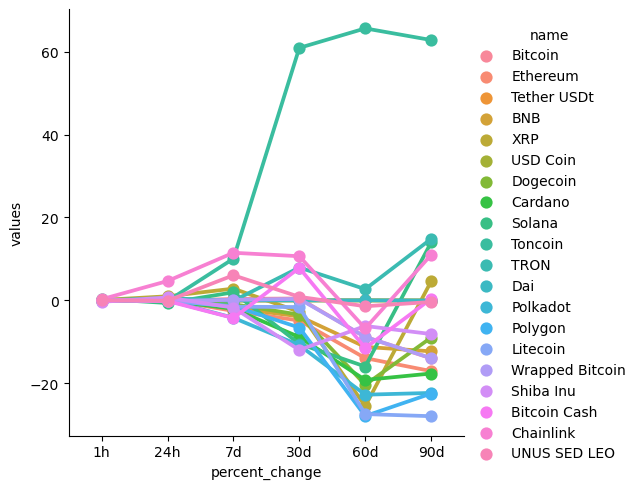

In [83]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')